In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('hh ru DATASET.csv')
dfc=pd.read_csv('cleared_data.csv')

In [34]:
data=pd.read_csv('cleared_data.csv')
data=data.drop(columns=['creation_date','vacancy_id','employer_id','employees_number','work_schedule','specialization','region_name',\
    'employment','length_of_employment','accept_teenagers','industry_id_list','young_female_response_count','young_male_response_count','correct_salary','length_industry_list',\
    'young_female_invitation_count','young_response_count','young_invitation_count'])
data=data.drop(columns=['young_male_invitation_count','female_response_count','male_response_count','female_invitation_count','male_invitation_count'])
data

,compensation_from,compensation_to,response_count,invitation_count
0,22500.0,22500.0,47,26
1,24000.0,30000.0,11,3
2,50000.0,50000.0,15,9
3,55000.0,150000.0,41,49
4,38500.0,56500.0,11,13
...,...,...,...,...
320393,96780.0,96780.0,10,9
320394,100000.0,150000.0,33,5
320395,35000.0,40000.0,6,34
320396,85000.0,85000.0,6,1


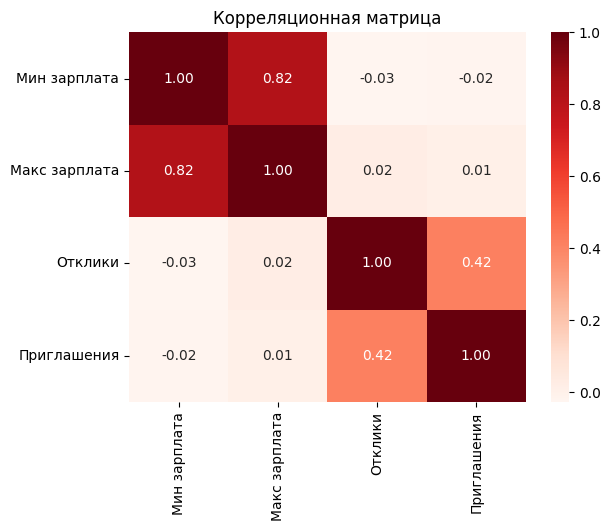

In [35]:
data=data.rename(columns={'compensation_from':'Мин зарплата','compensation_to':'Макс зарплата',\
    'response_count':'Отклики','female_response_count':'Отклики (ж)',\
    'male_response_count':'Отклики (м)','young_response_count':'Отклики от подростков',\
    'invitation_count':'Приглашения','female_invitation_count':'Приглашения (ж)',\
    'male_invitation_count':'Приглашения (м)','young_invitation_count':'Приглашения для подростков'})
correlation_matrix = data.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

<BarContainer object of 2 artists>

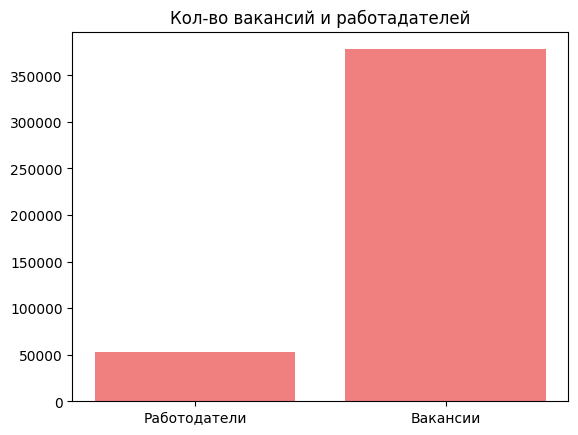

In [36]:
x= ['Работодатели','Вакансии']
y= [len(df.employer_id.unique()),len(df.vacancy_id.unique())]

plt.title('Кол-во вакансий и работадателей')
plt.bar(x,y,color='lightcoral')

<Axes: >

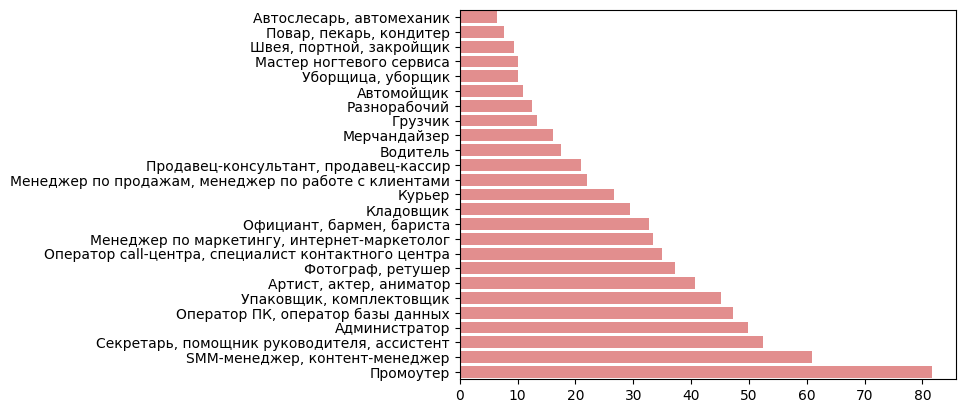

In [37]:
data= df['response_count'].groupby(by=df['specialization']).mean().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))
sns.barplot(data=data,color='lightcoral')

/tmp/ipykernel_31272/493178107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, palette='Reds')


<Axes: >

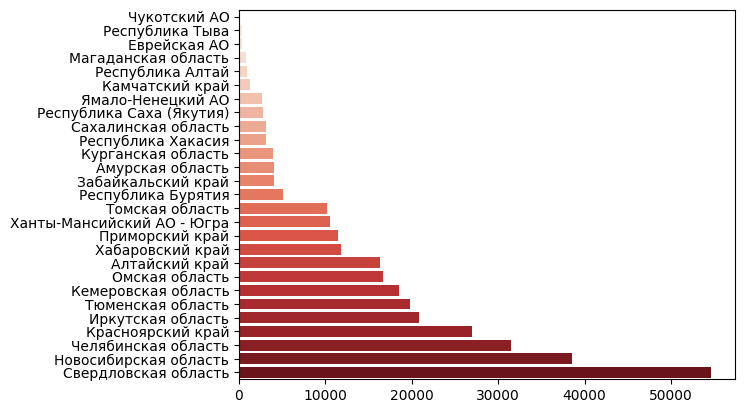

In [38]:
data= dfc['response_count'].groupby(by=dfc['region_name']).size().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))

sns.barplot(data=data, palette='Reds')

<BarContainer object of 2 artists>

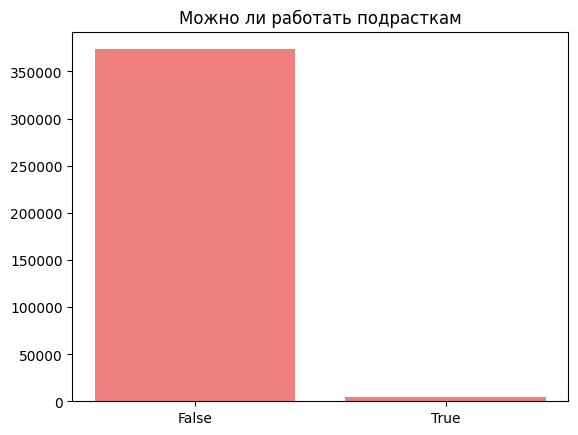

In [39]:
y=[len(df.loc[df['accept_teenagers']==False]),len(df.loc[df['accept_teenagers']==True])]
x=['False','True']

plt.title('Можно ли работать подрасткам')
plt.bar(x,y,color='lightcoral')


/tmp/ipykernel_31272/3188673349.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,color='lightcoral',palette='Reds')


<Axes: title={'center': 'Отклики мужчин и женщин'}>

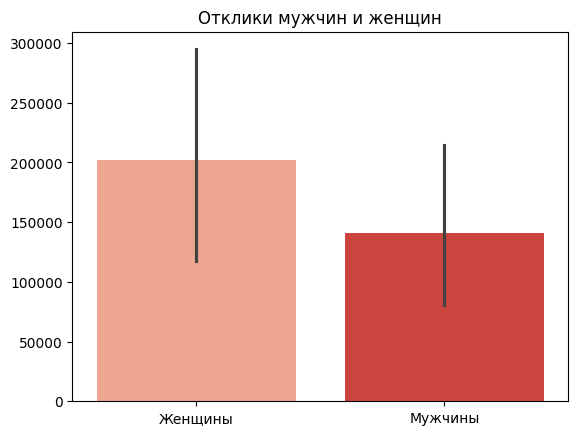

In [40]:
dfa=df.rename(columns={'female_response_count':'Женщины','male_response_count': 'Мужчины'})
data= dfa[['Женщины','Мужчины']].groupby(by=dfa['region_name']).sum().to_dict()


plt.title('Отклики мужчин и женщин')
sns.barplot(data=data,color='lightcoral',palette='Reds')

In [41]:
sum(df['response_count'])

9271952

In [42]:
sum(df['female_response_count'])/sum(df['response_count']), sum(df['male_response_count'])/sum(df['response_count'])

(0.5890678683409922, 0.4096943124813416)

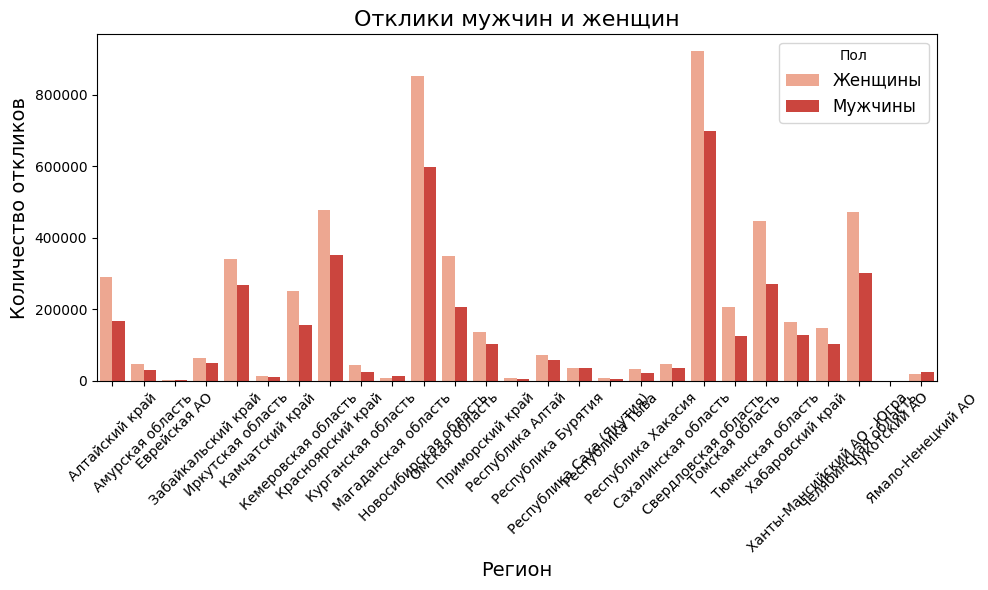

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration
# df = pd.DataFrame({
#     'region_name': ['Region A', 'Region B', 'Region A', 'Region B'],
#     'female_response_count': [10, 20, 15, 25],
#     'male_response_count': [5, 30, 10, 20]
# })

# Grouping the data
data = df[['female_response_count', 'male_response_count']].groupby(by=df['region_name']).sum()

# Resetting index to use region names as a column
data = data.reset_index()

# Melting the DataFrame for better plotting
data_melted = data.melt(id_vars='region_name', value_vars=['female_response_count', 'male_response_count'],
                        var_name='gender', value_name='response_count')

# Renaming the gender labels
data_melted['gender'] = data_melted['gender'].replace({
    'female_response_count': 'Женщины',
    'male_response_count': 'Мужчины'
})

# Setting the color palette
palette = sns.color_palette("Reds", n_colors=len(data_melted['gender'].unique()))

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='region_name', y='response_count', hue='gender', data=data_melted, palette=palette)

# Adding titles and labels
plt.title('Отклики мужчин и женщин', fontsize=16)
plt.xlabel('Регион', fontsize=14)
plt.ylabel('Количество откликов', fontsize=14)
plt.legend(title='Пол', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Show the plot
plt.show()

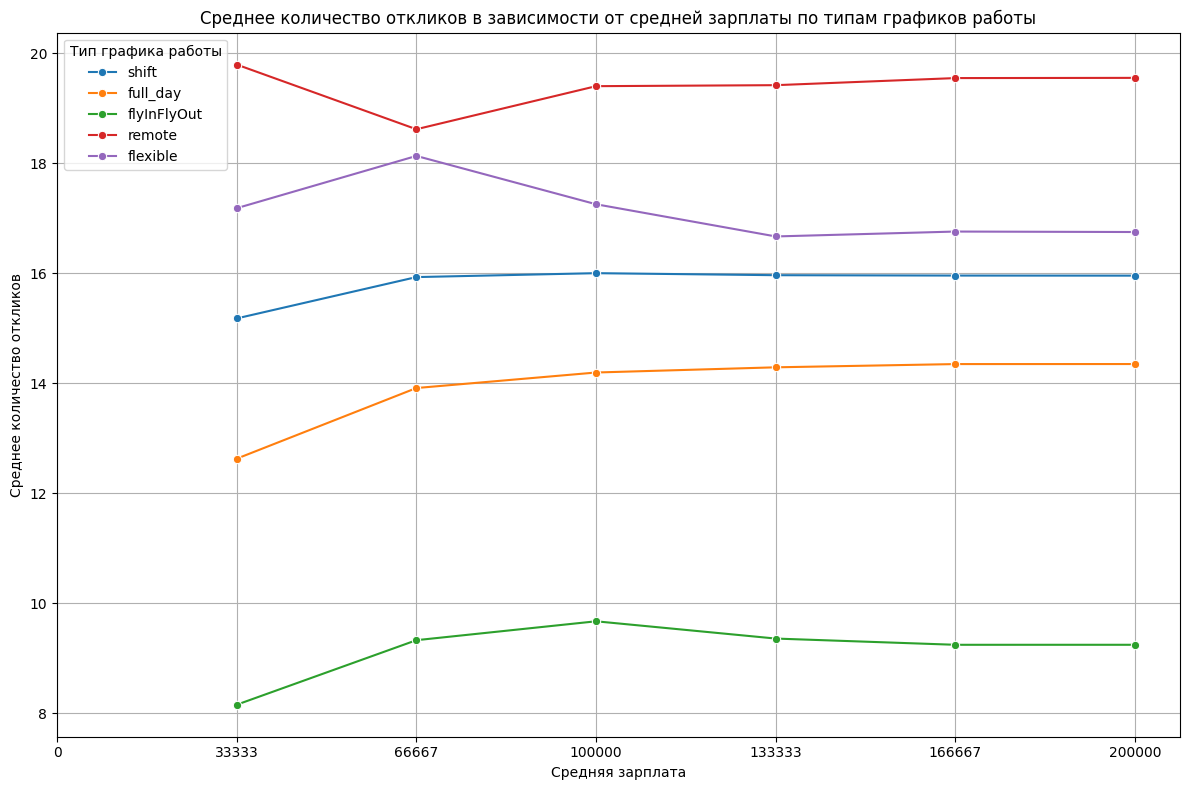

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv('cleared_data.csv')

# Вычисление средней зарплаты
df['average_salary'] = (df['compensation_from'] + df['compensation_to']) / 2

# Определение максимальной зарплаты
max_salary = df['compensation_to'].max()

# Создание диапазона средней зарплаты с шагом 1/6 от максимальной зарплаты
salary_steps = np.linspace(0, max_salary, num=7)  # 7 точек (0, 1/6, 2/6, ..., 1)

# Создание списка для хранения данных
average_responses_list = []

# Подсчет откликов по диапазонам зарплат для каждого типа графика работы
for schedule in df['work_schedule'].unique():
    schedule_data = df[df['work_schedule'] == schedule]
    for salary in salary_steps:
        average_response_count = schedule_data[schedule_data['average_salary'] <= salary]['male_response_count'].mean() + \
                                 schedule_data[schedule_data['average_salary'] <= salary]['female_response_count'].mean()
        average_responses_list.append({
            'average_salary': salary,
            'work_schedule': schedule,
            'average_response_count': average_response_count
        })

# Преобразование списка в DataFrame
average_responses = pd.DataFrame(average_responses_list)

# Построение графика
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_responses, x='average_salary', y='average_response_count', hue='work_schedule', marker='o')

# Настройка графика
plt.title('Среднее количество откликов в зависимости от средней зарплаты по типам графиков работы')
plt.xlabel('Средняя зарплата')
plt.ylabel('Среднее количество откликов')
plt.xticks(salary_steps)  # Устанавливаем метки по оси X
plt.legend(title='Тип графика работы')
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

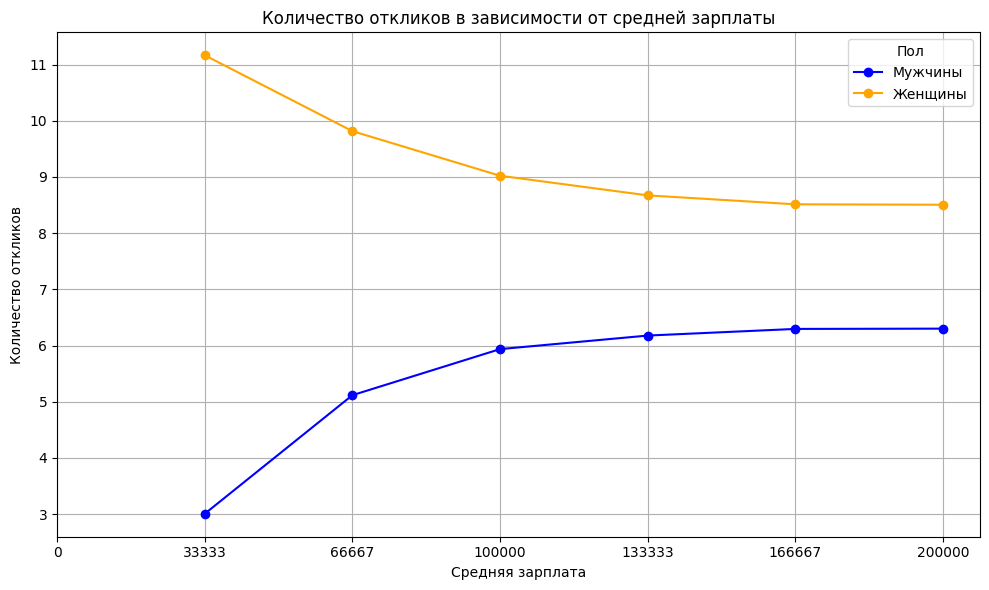

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('cleared_data.csv')


df['average_salary'] = (df['compensation_from'] + df['compensation_to']) / 2

# Определение максимальной зарплаты
max_salary = df['compensation_to'].max()

# Создание диапазона средней зарплаты с шагом 1/6 от максимальной зарплаты
salary_steps = np.linspace(0, max_salary, num=7)  # 7 точек (0, 1/6, 2/6, ..., 1)

# Подсчет откликов для мужчин и женщин по диапазонам зарплат
male_counts = []
female_counts = []

for salary in salary_steps:
    male_count = df[df['average_salary'] <= salary]['male_response_count'].mean()
    female_count = df[df['average_salary'] <= salary]['female_response_count'].mean()
    male_counts.append(male_count)
    female_counts.append(female_count)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(salary_steps, male_counts, marker='o', label='Мужчины', color='blue')
plt.plot(salary_steps, female_counts, marker='o', label='Женщины', color='orange')

# Настройка графика
plt.title('Количество откликов в зависимости от средней зарплаты')
plt.xlabel('Средняя зарплата')
plt.ylabel('Количество откликов')
plt.xticks(salary_steps)  # Устанавливаем метки по оси X
plt.legend(title='Пол')
plt.grid()
plt.tight_layout()

# Показать график
plt.show()

<Axes: >

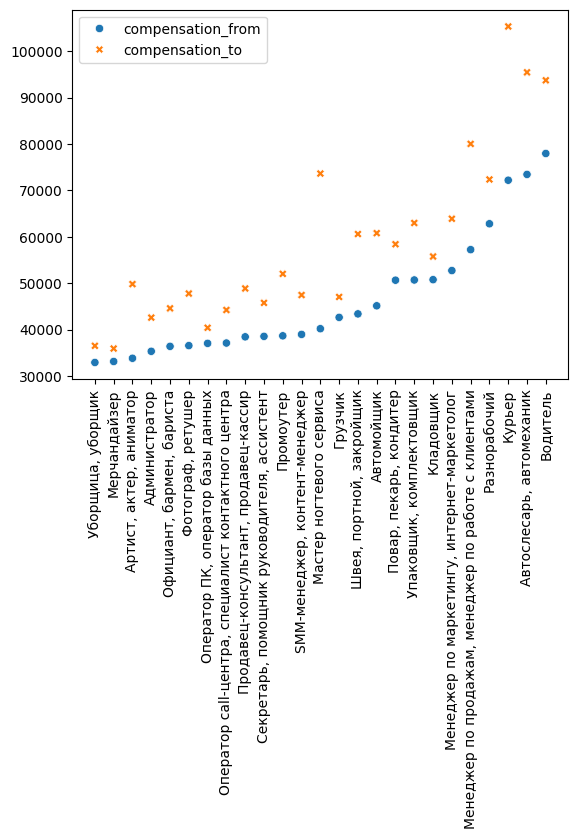

In [46]:
data= df[['compensation_from','compensation_to']].groupby(by=df['specialization']).mean().to_dict()
df_new = pd.DataFrame.from_dict(data)
df_new=df_new.sort_values('compensation_from')
plt.xticks(rotation=90)
sns.scatterplot(df_new)

/tmp/ipykernel_31272/3478557678.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(data_job_type_new.keys()), x=list(data_job_type_new.values()), palette='Reds')


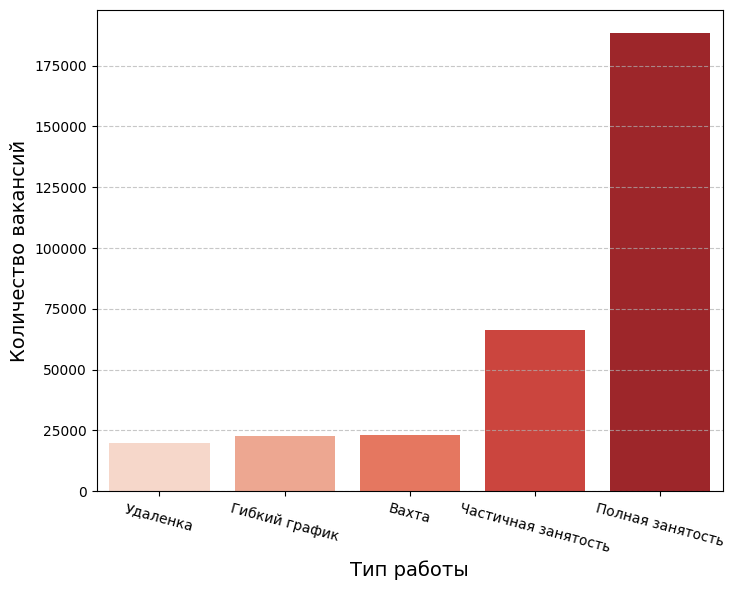

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагается, что df уже определен и содержит необходимые данные
df_new= pd.read_csv('cleared_data.csv')
df_old=pd.read_csv('hh ru DATASET.csv')
# Группировка данных и расчет среднего значения по опыту работы


# Создание отображения для меток опыта работы
label_mapping_experience = {
    'up_to_3_years': 'До 3 лет',
    'no_experience': 'Без опыта',
    'up_to_6_years': 'От 3 до 6 лет',
    'above_6_years': 'Свыше 6 лет'
}
# Создание отображения для меток типа работы
label_mapping_job_type = {
    'full_day': 'Полная занятость',
    'shift': 'Частичная занятость',
    'flexible': 'Гибкий график',
    'flyInFlyOut': 'Вахта',
    'remote': 'Удаленка'
}

data_experience_old = df_old['response_count'].groupby(by=df_old['length_of_employment']).size().to_dict()
data_experience_old = dict(sorted(data_experience_old.items(), key=lambda item: item[1]))
# Обновление ключей в словаре данных до русских меток
data_experience_old = {label_mapping_experience.get(key, key): value for key, value in data_experience_old.items()}
data_experience_old = dict(zip(data_experience_old.values(), data_experience_old.keys()))


data_experience_new = df_new['response_count'].groupby(by=df_new['length_of_employment']).size().to_dict()
data_experience_new = dict(sorted(data_experience_new.items(), key=lambda item: item[1]))
# Обновление ключей в словаре данных до русских меток
data_experience_new = {label_mapping_experience.get(key, key): value for key, value in data_experience_new.items()}
data_experience_new = dict(zip(data_experience_new.values(), data_experience_new.keys()))


# Группировка данных и расчет среднего значения по типу работы
data_job_type_old = df_old['response_count'].groupby(by=df_old['work_schedule']).size().to_dict()
data_job_type_old = dict(sorted(data_job_type_old.items(), key=lambda item: item[1]))



# Обновление ключей в словаре данных до русских меток
data_job_type_old = {label_mapping_job_type.get(key, key): value for key, value in data_job_type_old.items()}
data_job_type_old = dict(zip(data_job_type_old.values(), data_job_type_old.keys()))

# Группировка данных и расчет среднего значения по типу работы
data_job_type_new = df_new['response_count'].groupby(by=df_new['work_schedule']).size().to_dict()
data_job_type_new = dict(sorted(data_job_type_new.items(), key=lambda item: item[1]))

# Обновление ключей в словаре данных до русских меток
data_job_type_new = {label_mapping_job_type.get(key, key): value for key, value in data_job_type_new.items()}
data_job_type_new = dict(zip(data_job_type_new.values(), data_job_type_new.keys()))
# Создание фигуры с двумя подграфиками
plt.figure(figsize=(14, 6))

# # Первый график: по опыту работы
# plt.subplot(1, 2, 1)
# sns.barplot(x=list(data_experience_old.keys()), y=list(data_experience_old.values()), palette='Reds')
# plt.title('Количество вакансий по требуемому опыту работы ДО', fontsize=16)
# plt.ylabel('Опыт работы', fontsize=14)
# plt.xlabel('Количество вакансий', fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# # Первый график: по опыту работы
# plt.subplot(1, 2, 2)
# sns.barplot(x=list(data_experience_new.keys()), y=list(data_experience_new.values()), palette='Reds')
# plt.title('Количество вакансий по требуемому опыту работы ПОСЛЕ', fontsize=16)
# plt.ylabel('Опыт работы', fontsize=14)
# plt.xlabel('Количество вакансий', fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Второй график: по типу работы до
# plt.subplot(1, 2, 1)
# sns.barplot(x=list(data_job_type_old.keys()), y=list(data_job_type_old.values()), palette='Reds')
# plt.title('Количество вакансий по типу работы ДО', fontsize=16)

# plt.xlabel('Количество вакансий', fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# Второй график: по типу работы после
plt.subplot(1, 2,2 )
sns.barplot(y=list(data_job_type_new.keys()), x=list(data_job_type_new.values()), palette='Reds')
# plt.title('Количество вакансий по типу работы ПОСЛЕ', fontsize=16)
plt.xlabel('Тип работы', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.xticks(rotation=345)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Улучшение компоновки
plt.tight_layout()

# Показать графики
plt.show()

<Axes: title={'center': 'тип занятости'}>

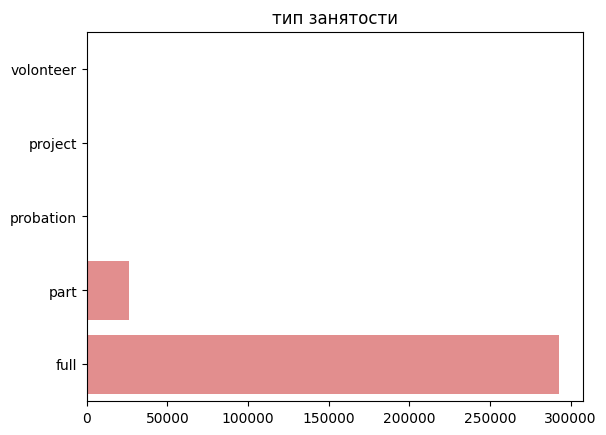

In [48]:
data= df['response_count'].groupby(by=df['employment']).size().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))

plt.title('тип занятости')
sns.barplot(data=data,color='lightcoral')

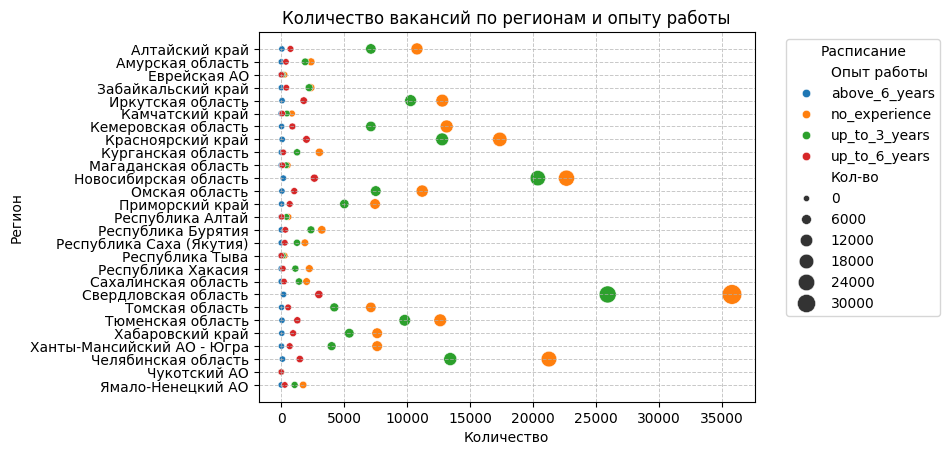

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('hh ru DATASET.csv')
# Пример исходного датасета
data = {
    'Опыт': df['length_of_employment'],
    'Регион': df['region_name']
}

# Создаем DataFrame
dfn = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = dfn.pivot_table(index='Регион', 
                             columns='Опыт', 
                             aggfunc='size', 
                             fill_value=0)

# Преобразуем сводную таблицу в формат "длинного" DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_melted = pivot_table_reset.melt(id_vars='Регион', var_name='Опыт работы', value_name='Кол-во')

# Создаем график с поменянными осями
sns.scatterplot(data=pivot_table_melted, x='Кол-во', y='Регион', hue='Опыт работы', size='Кол-во', sizes=(20, 200))

# Подписи осей
plt.xlabel('Количество')
plt.ylabel('Регион')
plt.title('Количество вакансий по регионам и опыту работы')
plt.legend(title='Расписание', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Настройка стиля сетки

# Отображаем график
plt.show()

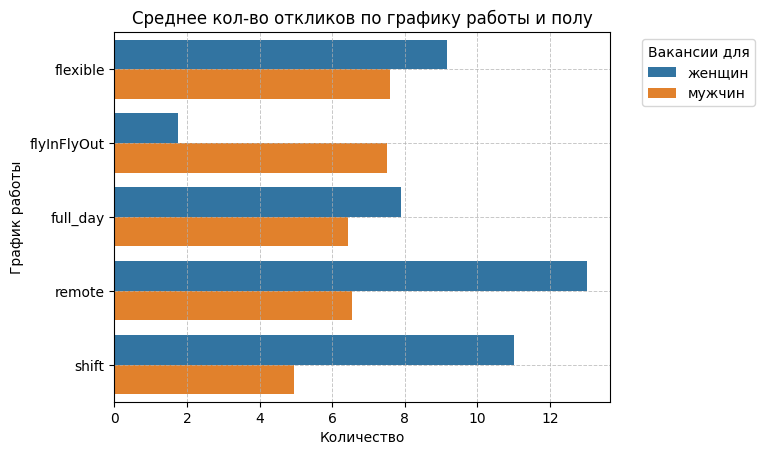

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('cleared_data.csv')
# Пример исходного датасета

data = {

    'мужчин': df['male_response_count'],
    'женщин': df['female_response_count'],
    'График работы': df['work_schedule']
}

# Создаем DataFrame
dfn = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = dfn.pivot_table(index='График работы',                       
                             aggfunc='mean', 
                             fill_value=0)

#Преобразуем сводную таблицу в формат "длинного" DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_melted = pivot_table_reset.melt(id_vars='График работы', var_name='График', value_name='Кол-во')

# Создаем график с поменянными осями
sns.barplot(data=pivot_table_melted, x='Кол-во', y='График работы', hue='График')

# Подписи осей
plt.xlabel('Количество')
plt.ylabel('График работы')
plt.title('Среднее кол-во откликов по графику работы и полу')
plt.legend(title='Вакансии для', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Настройка стиля сетки

# Отображаем график
plt.show()

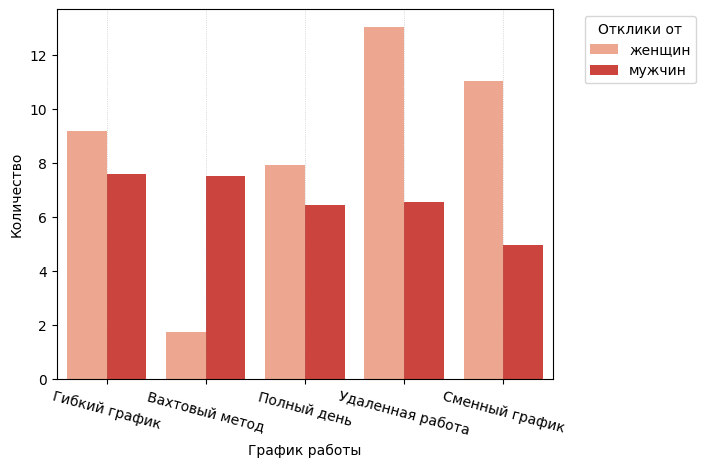

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('cleared_data.csv')

# Пример исходного датасета
data = {
    'мужчин': df['male_response_count'],
    'женщин': df['female_response_count'],
    'График работы': df['work_schedule']
}

# Создаем DataFrame
dfn = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = dfn.pivot_table(index='График работы', aggfunc='mean', fill_value=0)

# Преобразуем сводную таблицу в формат "длинного" DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_melted = pivot_table_reset.melt(id_vars='График работы', var_name='График', value_name='Кол-во')

# Словарь для перевода названий графиков
schedule_translation = {
    'full_day': 'Полный день',
    'remote': 'Удаленная работа',
    'flexible': 'Гибкий график',
    'shift': 'Сменный график',
    'flyInFlyOut': 'Вахтовый метод'
}

# Заменяем названия графиков
pivot_table_melted['График работы'] = pivot_table_melted['График работы'].replace(schedule_translation)

# Создаем график с поменянными осями
# Используем более яркую палитру
bright_palette = sns.color_palette("Reds", n_colors=len(pivot_table_melted['График'].unique()))
sns.barplot(data=pivot_table_melted, x='График работы', y='Кол-во', hue='График', palette=bright_palette)

# Подписи осей
plt.ylabel('Количество')
plt.xlabel('График работы')
# plt.title('Среднее кол-во откликов по графику работы и полу')
plt.legend(title='Отклики от', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 345)
# Настройка стиля сетки
plt.grid(axis='x', linestyle=':', linewidth=0.5, alpha=0.5, color='gray')  # Легкая серая сетка только по оси X

# Отображаем график
plt.show()

<Axes: title={'center': 'Опыт работы'}>

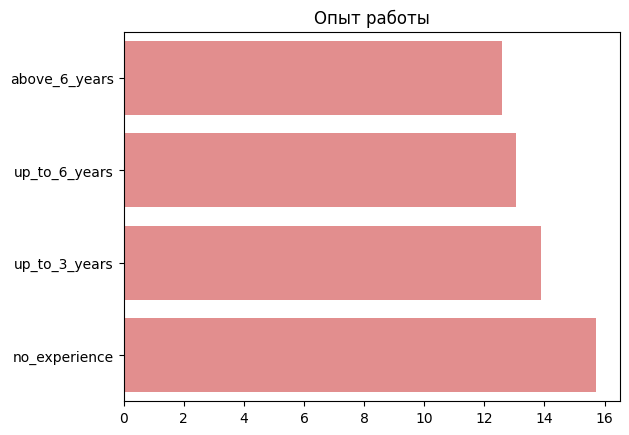

In [52]:
data= df['response_count'].groupby(by=df['length_of_employment']).mean().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))

plt.title('Опыт работы')
sns.barplot(data=data,color='lightcoral')

In [53]:
df.loc[df['length_of_employment']=='above_6_years']['compensation_from'].mean()

70890.51934826883

<Axes: title={'center': 'Средняя макс зп по решионам по регионам'}>

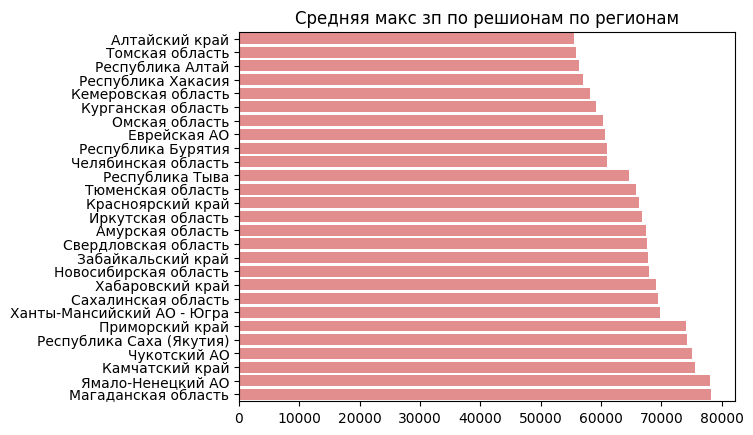

In [54]:
data= df['compensation_to'].groupby(by=df['region_name']).mean().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))

plt.title('Средняя макс зп по решионам по регионам')
sns.barplot(data=data,color='lightcoral')

<Axes: title={'center': 'Кол-во работадателей по регионам'}>

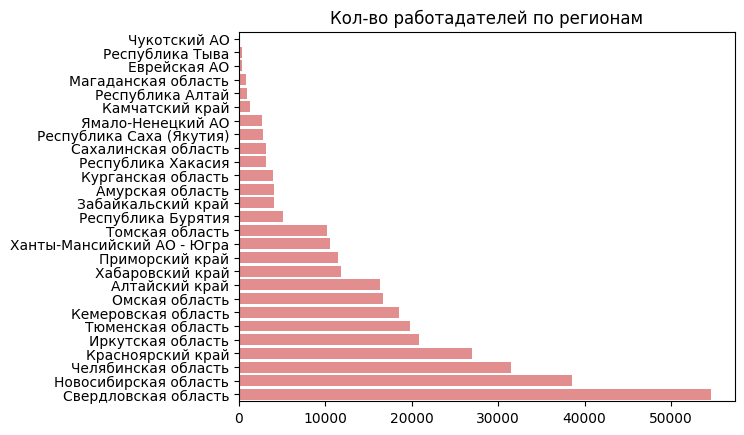

In [55]:
data= df['employer_id'].groupby(by=df['region_name']).size().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))

plt.title('Кол-во работадателей по регионам')
sns.barplot(data=data,color='lightcoral')

In [56]:
df['response_count']

0         47
1         11
2         15
3         41
4         11
          ..
320393    10
320394    33
320395     6
320396     6
320397     3
Name: response_count, Length: 320398, dtype: int64

In [57]:
y1=[df.loc[df['region_name']=='Республика Тыва']['employees_number'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['compensation_from'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['compensation_to'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['response_count'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['female_response_count'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['male_response_count'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['invitation_count'].mean(),\
    df.loc[df['region_name']=='Республика Тыва']['employer_id'].shape[0]]

y2=[df['employees_number'].mean(),\
    df['compensation_from'].mean(),\
    df['compensation_to'].mean(),\
    df['response_count'].mean(),\
    df['female_response_count'].mean(),\
    df['male_response_count'].mean(),\
    df['invitation_count'].mean(),\
    df['employer_id'].shape[0]]


In [58]:
print(y2)
print(y1)

[4282.71047884194, 51555.41833594467, 65087.66911778475, 14.805548099551183, 8.505109270345008, 6.300438829206175, 10.595038046429753, 320398]
[12923.101408450704, 50600.95211267606, 64689.96056338028, 22.96901408450704, 14.307042253521127, 8.661971830985916, 13.101408450704225, 355]


In [59]:
df


,vacancy_id,employer_id,employees_number,creation_date,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,...,young_male_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,young_female_invitation_count,young_male_invitation_count,industry_id_list,correct_salary,length_industry_list
0,78161908,4809555,50,2023-03-17,shift,full,no_experience,22500.0,22500.0,False,...,1,26,26,0,2,2,0,[None],approximately,0
1,79496395,5667513,5,2023-04-19,shift,full,up_to_3_years,24000.0,30000.0,False,...,0,3,3,0,0,0,0,[None],correct,0
2,87102246,1072323,0,2023-09-21,full_day,full,up_to_3_years,50000.0,50000.0,False,...,0,9,7,2,0,0,0,"[7, 8]",approximately,2
3,76367381,1160192,0,2023-01-30,full_day,full,up_to_3_years,55000.0,150000.0,False,...,0,49,39,10,0,0,0,"[5, 13]",correct,2
4,81516485,1025275,38000,2023-06-05,shift,full,no_experience,38500.0,56500.0,False,...,1,13,0,13,1,0,1,"[8, 41]",correct,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320393,87825374,3558,7000,2023-10-06,flyInFlyOut,full,up_to_3_years,96780.0,96780.0,False,...,0,9,8,1,0,0,0,[50],approximately,1
320394,77397135,4446306,2,2023-02-27,remote,full,above_6_years,100000.0,150000.0,False,...,0,5,3,2,0,0,0,[7],correct,1
320395,75924698,2067104,0,2023-01-18,shift,full,up_to_3_years,35000.0,40000.0,False,...,0,34,34,0,0,0,0,[None],correct,0
320396,84486705,1838,0,2023-08-03,full_day,full,up_to_3_years,85000.0,85000.0,False,...,0,1,0,1,0,0,0,[44],approximately,1


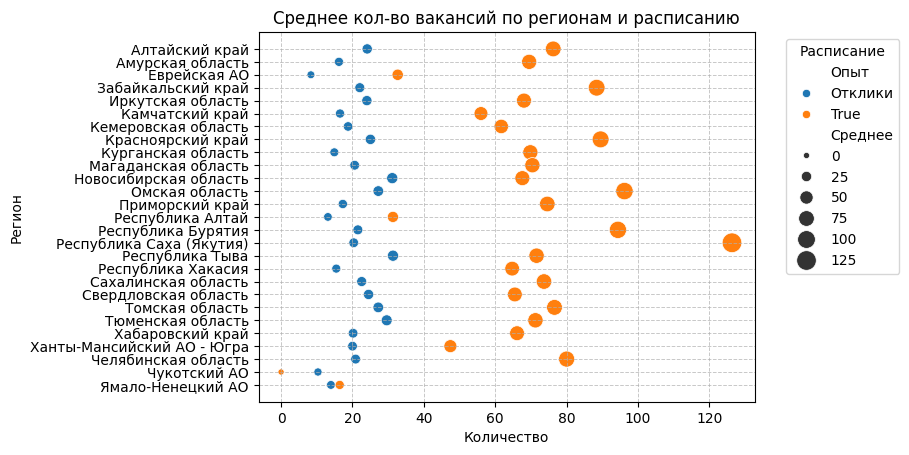

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('hh ru DATASET.csv')
# Пример исходного датасета
data = {
    'Опыт': df['accept_teenagers'],
    'Регион': df['region_name'],
    'Отклики': df['response_count']
}

# Создаем DataFrame
dfn = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = dfn.pivot_table(index='Регион', 
                             columns='Опыт', 
                             aggfunc={'Отклики': 'mean'}, 
                             fill_value=0)

# Преобразуем сводную таблицу в формат "длинного" DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_reset.columns = [tup[1] if tup[1] else tup[0] for tup in pivot_table_reset.columns]
pivot_table_melted = pivot_table_reset.melt(id_vars= 'Регион', var_name='Опыт', value_name='Среднее')

# Создаем график с поменянными осями
sns.scatterplot(data=pivot_table_melted, x='Среднее', y= 'Регион', hue='Опыт', size='Среднее', sizes=(20, 200))

# Подписи осей
plt.xlabel('Количество')
plt.ylabel('Регион')
plt.title('Среднее кол-во вакансий по регионам и расписанию')
plt.legend(title='Расписание', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Настройка стиля сетки

# Отображаем график
plt.show()

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('hh ru DATASET.csv')
# Пример исходного датасета
data = {
    'подростков': df['young_response_count'],
    'мужчин': df['male_response_count'],
    'женщин': df['female_response_count'],
    'Регион': df['region_name']
}

# Создаем DataFrame
dfn = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = dfn.pivot_table(index='Регион',                       
                             aggfunc='sum', 
                             fill_value=0)

#Преобразуем сводную таблицу в формат "длинного" DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_melted = pivot_table_reset.melt(id_vars='Регион', var_name='График', value_name='Кол-во')
pivot_table_reset
# # Создаем график с поменянными осями
# sns.barplot(data=pivot_table_melted, x='Кол-во', y='Регион', hue='График')

# # Подписи осей
# plt.xlabel('Количество')
# plt.ylabel('Регион')
# plt.title('Количество вакансий по регионам и полу')
# plt.legend(title='Вакансии для', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Настройка стиля сетки

# # Отображаем график
# plt.show()

,Регион,женщин,мужчин,подростков
0,Алтайский край,291029,167522,36102
1,Амурская область,45594,31097,5026
2,Еврейская АО,2169,1485,447
3,Забайкальский край,62389,49000,8035
4,Иркутская область,341283,268835,51502
5,Камчатский край,12591,10975,2316
6,Кемеровская область,250882,157292,37337
7,Красноярский край,478195,350963,72442
8,Курганская область,44451,24528,6610
9,Магаданская область,8529,13262,1752


In [63]:
dfn=df.drop(columns=['employees_number','young_female_response_count','young_male_response_count','young_female_invitation_count','young_male_invitation_count'])
dfn

,vacancy_id,employer_id,creation_date,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,specialization,region_name,response_count,female_response_count,male_response_count,young_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,industry_id_list
0,77424192,2571258,2023-02-27,full_day,full,up_to_3_years,35000.0,0.0,False,Администратор,Новосибирская область,327,320,7,4,21,21,0,0,[48]
1,78161908,4809555,2023-03-17,shift,full,no_experience,22500.0,NaN,False,Администратор,Новосибирская область,47,41,6,5,26,26,0,2,[None]
2,79496395,5667513,2023-04-19,shift,full,up_to_3_years,24000.0,30000.0,False,Администратор,Свердловская область,11,10,1,2,3,3,0,0,[None]
3,87102246,1072323,2023-09-21,full_day,full,up_to_3_years,50000.0,NaN,False,"Менеджер по продажам, менеджер по работе с кли...",Новосибирская область,15,10,5,0,9,7,2,0,"[7, 8]"
4,76367381,1160192,2023-01-30,full_day,full,up_to_3_years,55000.0,150000.0,False,"Менеджер по продажам, менеджер по работе с кли...",Приморский край,41,28,13,0,49,39,10,0,"[5, 13]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377760,87825374,3558,2023-10-06,flyInFlyOut,full,up_to_3_years,96780.0,0.0,False,"Продавец-консультант, продавец-кассир",Красноярский край,10,9,1,0,9,8,1,0,[50]
377761,77397135,4446306,2023-02-27,remote,full,above_6_years,100000.0,150000.0,False,"Менеджер по продажам, менеджер по работе с кли...",Красноярский край,33,14,19,0,5,3,2,0,[7]
377762,75924698,2067104,2023-01-18,shift,full,up_to_3_years,35000.0,40000.0,False,"Повар, пекарь, кондитер",Иркутская область,6,4,2,0,34,34,0,0,[None]
377763,84486705,1838,2023-08-03,full_day,full,up_to_3_years,85000.0,0.0,False,"Продавец-консультант, продавец-кассир",Челябинская область,6,0,6,0,1,0,1,0,[44]


In [64]:
dub_data=dfn.loc[dfn[['employer_id','work_schedule','employment','length_of_employment',\
    'compensation_from','compensation_to','accept_teenagers','specialization','region_name','industry_id_list']].duplicated(keep=False)].reset_index()\
        .drop(columns=['index'])
uni_data=dfn.drop(list(dub_data.index)).reset_index(inplace=False).drop(columns=['index'])

<BarContainer object of 2 artists>

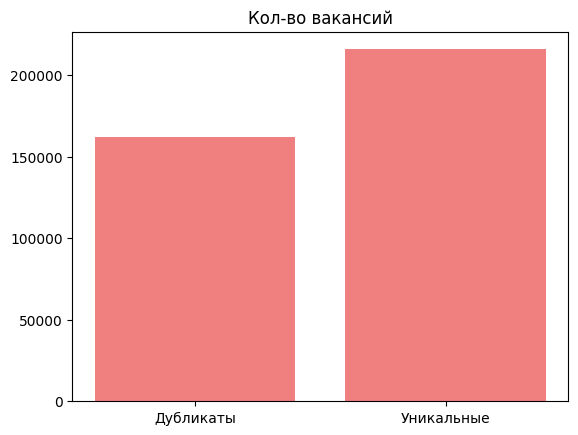

In [65]:
y=[dub_data['response_count'].size, uni_data['response_count'].size]
x=['Дубликаты','Уникальные']

plt.title('Кол-во вакансий')
plt.bar(x,y,color='lightcoral')

<Axes: >

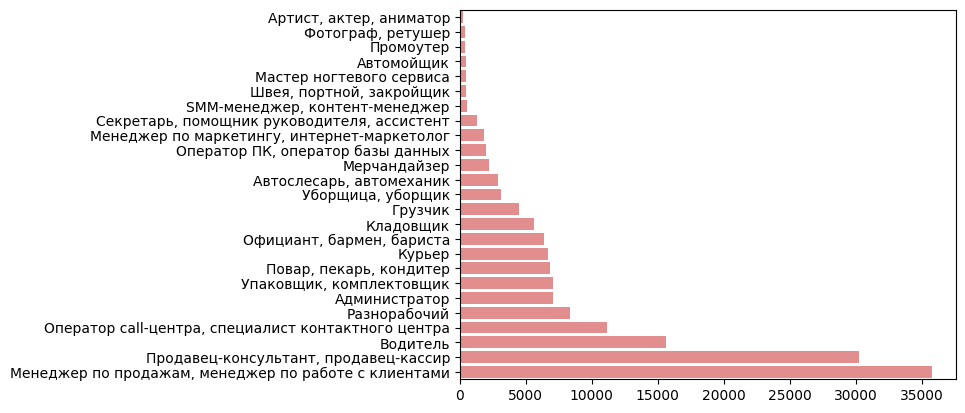

In [66]:
data= dub_data['specialization'].groupby(by=dub_data['specialization']).size().to_dict()
data=dict(sorted(data.items(), key=lambda item: item[1]))
data= dict(zip(data.values(), data.keys()))
sns.barplot(data=data,color='lightcoral')

In [67]:
clear_data=pd.read_csv('cleared_data.csv')
clear_data['mes']= [x[5:7] for x in clear_data['creation_date']]
dfn=clear_data.drop(columns=['employees_number','young_female_response_count','young_male_response_count','young_female_invitation_count','young_male_invitation_count'])
dub_data=dfn.loc[dfn[['employer_id','work_schedule','employment','length_of_employment',\
    'compensation_from','compensation_to','accept_teenagers','specialization','region_name','industry_id_list']].duplicated(keep=False)].reset_index()\
        .drop(columns=['index'])
uni_data=dfn.drop(list(dub_data.index)).reset_index(inplace=False).drop(columns=['index'])

/tmp/ipykernel_31272/2992523132.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--b" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y2,'--b', c='b', label='Уникальные')


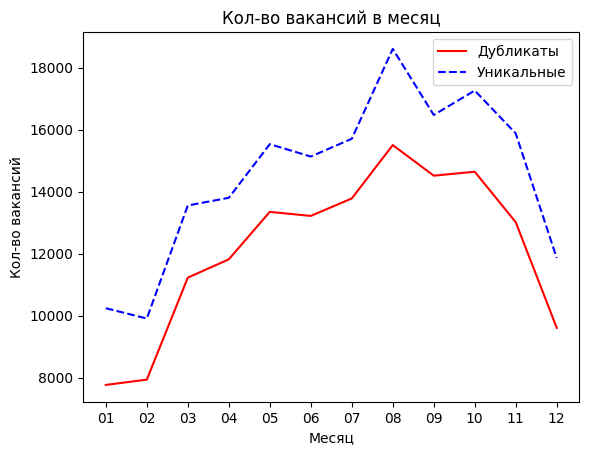

In [68]:
data= dub_data['response_count'].groupby(by=dub_data['mes']).size().to_dict()
data1= uni_data['response_count'].groupby(by=uni_data['mes']).size().to_dict()
x=list(data.keys())
y1=list(data.values())
y2=list(data1.values())
fig, ax = plt.subplots()
plt.ylabel('Кол-во вакансий')
plt.xlabel('Месяц')
plt.title('Кол-во вакансий в месяц')
ax.plot(x, y1 ,c='r', label='Дубликаты')
ax.plot(x, y2,'--b', c='b', label='Уникальные')
leg = ax.legend()
# sns.barplot(data=data,color='lightcoral')

In [69]:
print(len(dub_data)/len(clear_data),len(uni_data)/len(clear_data))

0.45696290239015225 0.5430370976098478


/tmp/ipykernel_31272/723354895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Reds')  # светло-красный и темно-красный цвет


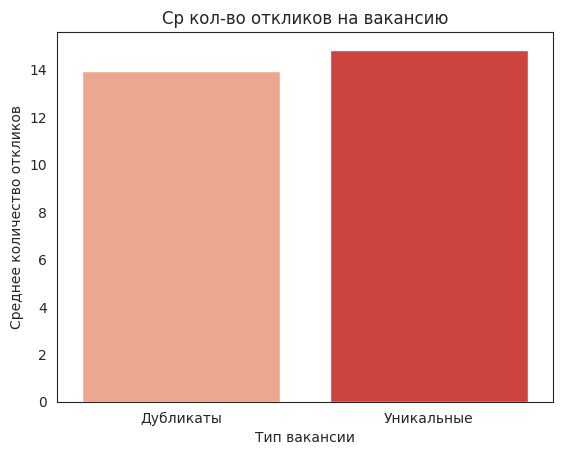

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white') 
y=[dub_data['response_count'].mean(), uni_data['response_count'].mean()]
x=['Дубликаты','Уникальные']
 # или 'whitegrid' для светлой темы
plt.title('Ср кол-во откликов на вакансию')
sns.barplot(x=x, y=y, palette='Reds')  # светло-красный и темно-красный цвет
plt.xlabel('Тип вакансии')
plt.ylabel('Среднее количество откликов')

plt.show()

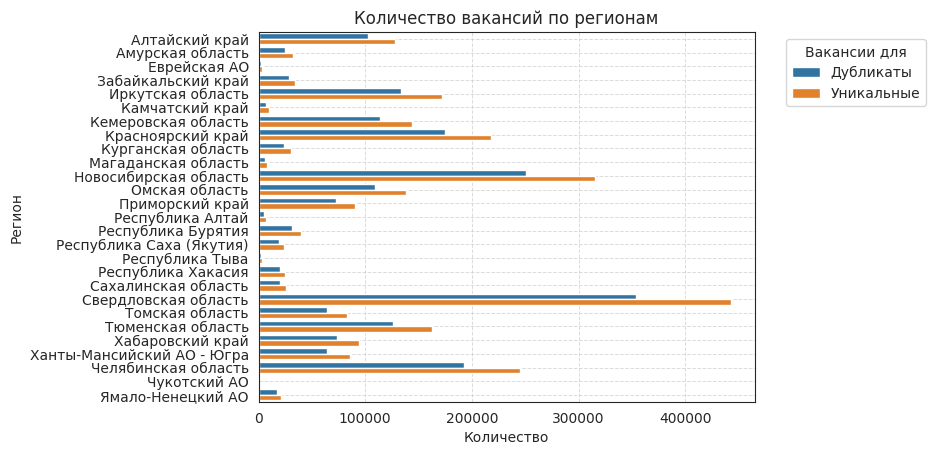

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('hh ru DATASET.csv')
# Пример исходного датасета
data = {
    'Дубликаты': dub_data['response_count'],
    'Уникальные': uni_data['response_count'],
    'Регион': df['region_name']
}

# Создаем DataFrame
dfn = pd.DataFrame(data)

# Создаем сводную таблицу
pivot_table = dfn.pivot_table(index='Регион',                       
                             aggfunc='sum', 
                             fill_value=0)

#Преобразуем сводную таблицу в формат "длинного" DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_melted = pivot_table_reset.melt(id_vars='Регион', var_name='График', value_name='Кол-во')

# Создаем график с поменянными осями
sns.barplot(data=pivot_table_melted, x='Кол-во', y='Регион', hue='График')

# Подписи осей
plt.xlabel('Количество')
plt.ylabel('Регион')
plt.title('Количество вакансий по регионам')
plt.legend(title='Вакансии для', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Настройка стиля сетки

# Отображаем график
plt.show()

In [72]:
dub_data.columns

Index(['vacancy_id', 'employer_id', 'creation_date', 'work_schedule',
       'employment', 'length_of_employment', 'compensation_from',
       'compensation_to', 'accept_teenagers', 'specialization', 'region_name',
       'response_count', 'female_response_count', 'male_response_count',
       'young_response_count', 'invitation_count', 'female_invitation_count',
       'male_invitation_count', 'young_invitation_count', 'industry_id_list',
       'correct_salary', 'length_industry_list', 'mes'],
      dtype='object')

In [73]:
import pandas as pd

# Пример датасета
data = {
    'employer_id': [1, 1, 2, 2, 1],
    'work_schedule': ['full-time', 'full-time', 'part-time', 'part-time', 'full-time'],
    'employment': ['permanent', 'temporary', 'permanent', 'temporary', 'permanent'],
    'length_of_employment': [12, 6, 12, 6, 12],
    'compensation_from': [50000, 40000, 60000, 45000, 50000],
    'compensation_to': [70000, 60000, 80000, 65000, 70000],
    'accept_teenagers': [True, False, True, False, True],
    'specialization': ['IT', 'HR', 'IT', 'HR', 'IT'],
    'region_name': ['Region1', 'Region1', 'Region2', 'Region2', 'Region1'],
    'industry_id_list': ['1,2', '1,3', '2,3', '1,2', '1,2'],
    'response_count': [10, 5, 8, 3, 7]
}

df = pd.DataFrame(data)

# Выводим исходный датасет
print("Исходный датасет:")
print(df)

# Группируем по указанным столбцам и выполняем подсчет и суммирование
grouped_df = df.groupby(
    ['employer_id', 'work_schedule', 'employment', 'length_of_employment', 
     'compensation_from', 'compensation_to', 'accept_teenagers', 
     'specialization', 'region_name', 'industry_id_list'],
    as_index=False
).agg(
    count=('response_count', 'size'),  # Подсчет количества вхождений
    total_response_count=('response_count', 'sum')  # Суммирование значений в столбце response_count
)

# Выводим сгруппированный датасет
print("\nСгруппированный датасет с подсчетом и суммированием:")
grouped_df

Исходный датасет:
   employer_id work_schedule employment  length_of_employment  \
0            1     full-time  permanent                    12   
1            1     full-time  temporary                     6   
2            2     part-time  permanent                    12   
3            2     part-time  temporary                     6   
4            1     full-time  permanent                    12   

   compensation_from  compensation_to  accept_teenagers specialization  \
0              50000            70000              True             IT   
1              40000            60000             False             HR   
2              60000            80000              True             IT   
3              45000            65000             False             HR   
4              50000            70000              True             IT   

  region_name industry_id_list  response_count  
0     Region1              1,2              10  
1     Region1              1,3               5  

,employer_id,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,specialization,region_name,industry_id_list,count,total_response_count
0,1,full-time,permanent,12,50000,70000,True,IT,Region1,"1,2",2,17
1,1,full-time,temporary,6,40000,60000,False,HR,Region1,"1,3",1,5
2,2,part-time,permanent,12,60000,80000,True,IT,Region2,"2,3",1,8
3,2,part-time,temporary,6,45000,65000,False,HR,Region2,"1,2",1,3


/tmp/ipykernel_31272/3065033009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_df, x='count', y='average_response', palette='coolwarm')


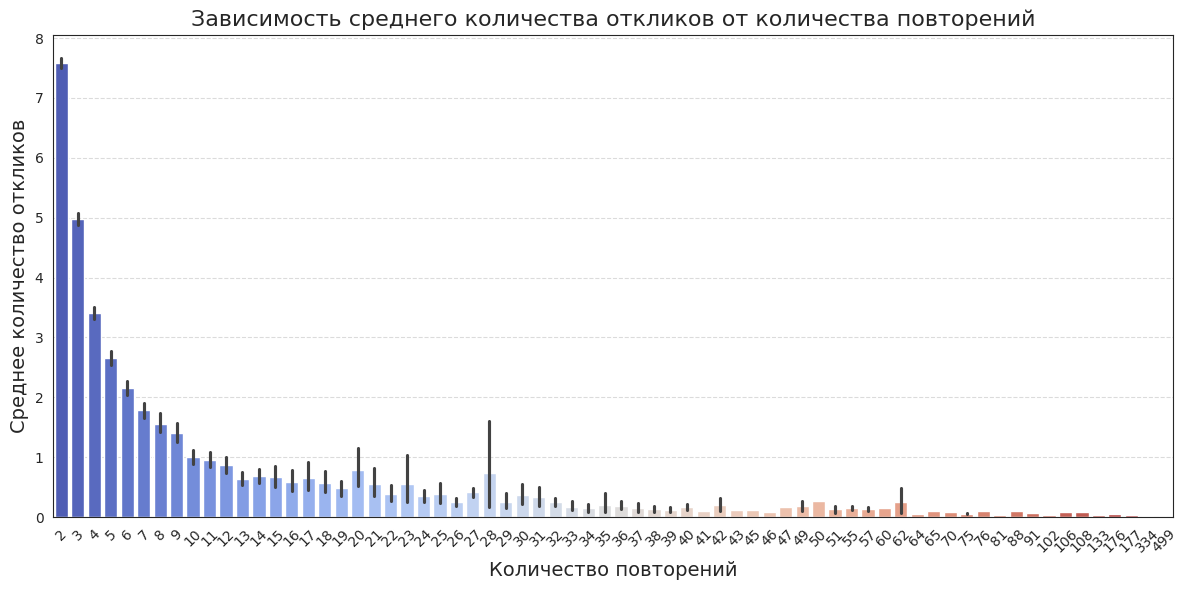

In [74]:

grouped_df = dub_data.groupby(
    ['employer_id', 'work_schedule', 'employment', 'length_of_employment', 
     'compensation_from', 'compensation_to', 'accept_teenagers', 
     'specialization', 'region_name', 'industry_id_list'],
    as_index=False
).agg(
    count=('response_count', 'size'),  # Подсчет количества вхождений
    total_response_count=('response_count', 'mean')  # Суммирование значений в столбце response_count
)
data= grouped_df['total_response_count'].groupby(by=grouped_df['count']).mean().to_dict()
grouped_df['average_response'] = grouped_df['total_response_count'] / grouped_df['count']

# Настройка графика

plt.figure(figsize=(12, 6))

sns.barplot(data=grouped_df, x='count', y='average_response', palette='coolwarm')


# Добавление заголовка и меток

plt.title('Зависимость среднего количества откликов от количества повторений', fontsize=16)
plt.xlabel('Количество повторений', fontsize=14)
plt.ylabel('Среднее количество откликов', fontsize=14)


# Улучшение оформления

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()


# Показать график

plt.show()

In [75]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import chi2_contingency, normaltest
import matplotlib.pyplot as plt


def get_types(df):
    typ = dict()
    for x in df.columns:
        if len(df[x].value_counts()) < 10:
            typ[x] = 'categorical'
        else:
            typ[x] = 'numeric'
    return typ


def cramers(chi2, n, k, r):
    return (chi2 / (n * min(k - 1, r - 1))) ** 0.5


def all_correlations(df, types=None):
    if not types:
        types = get_types(df)
    results = []
    for x in df.columns:
        for y in df.columns:
            if types[x] == types[y] and types[x] == 'categorical':
                crs = pd.crosstab(df[x], df[y])
                stat = chi2_contingency(crs)
                n = crs.values.sum()
                k = crs.shape[0]
                r = crs.shape[1]
                if stat.pvalue > 0.05:
                    v = 0
                else:
                    v = cramers(stat.statistic, n, k, r)
                results.append((x, y, v))
            elif types[x] == types[y] and types[x] == 'numeric':
                if normaltest(df[x].tolist()).pvalue <= 0.05 or normaltest(df[y].tolist()).pvalue <= 0.05:
                    crs = df[x].corr(df[y], method='spearman')
                else:
                    crs = df[x].corr(df[y], method='pearson')
                results.append((x, y, crs))
            else:
                if types[x] == 'numeric' and types[y] == 'categorical':
                    num_col = x
                    cat_col = y
                else:
                    num_col = y
                    cat_col = x
                groups = [df[num_col][df[cat_col] == value] for value in df[cat_col].unique()]

                total_variance = np.var(df[num_col], ddof=1)
                group_means = [g.mean() for g in groups]
                group_sizes = [len(g) for g in groups]
                group_variance = sum(
                    size * (mean - df[num_col].mean()) ** 2 for size, mean in zip(group_sizes, group_means)) / len(df)

                eta_squared = group_variance / total_variance
                results.append((x, y, eta_squared))
    correlations = pd.DataFrame(columns=df.columns, index=df.columns)
    for x, y, metric in results:
        correlations.loc[x, y] = round(metric, 2)
    return correlations.astype(float)


In [76]:
df=pd.read_csv('cleared_data.csv')
df.columns

Index(['vacancy_id', 'employer_id', 'employees_number', 'creation_date',
       'work_schedule', 'employment', 'length_of_employment',
       'compensation_from', 'compensation_to', 'accept_teenagers',
       'specialization', 'region_name', 'response_count',
       'female_response_count', 'male_response_count', 'young_response_count',
       'young_female_response_count', 'young_male_response_count',
       'invitation_count', 'female_invitation_count', 'male_invitation_count',
       'young_invitation_count', 'young_female_invitation_count',
       'young_male_invitation_count', 'industry_id_list', 'correct_salary',
       'length_industry_list'],
      dtype='object')

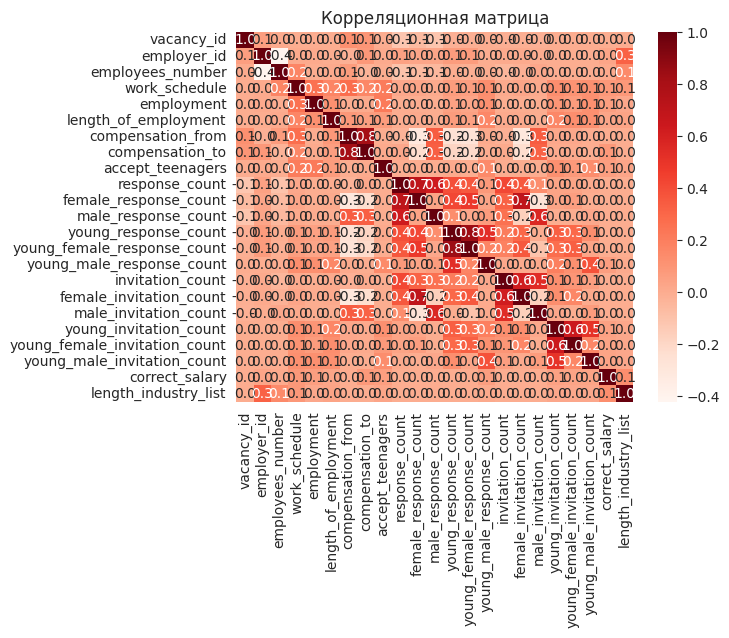

In [82]:
df=pd.read_csv('cleared_data.csv')
df=df.drop(columns=['creation_date','industry_id_list','specialization','region_name'])
corell=all_correlations(df)
sns.heatmap(corell, annot=True, cmap='Reds', fmt=".1f")
plt.title('Корреляционная матрица')
plt.show()